In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

## Ejemplo capítulo 1:

En este notebook se desarrolla el ejemplo del capítulo 1 del libro *El método de los elementos finitos: Un enfoque teórico práctico* (Galeano, Mantilla y Galvis 2016). La idea es poder desarrollar el ejemplo al tiempo con el texto para poder agarrar un poco mejor el concepto y poder empezar a aprender sobre el método de los elementos finitos. 

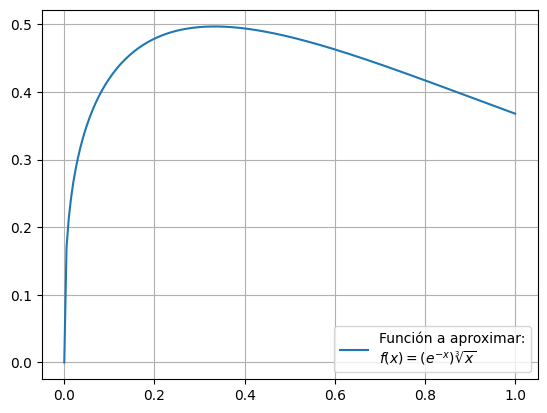

In [2]:
# Función que quiero aproximar
def phi(x): return (x ** (1 / 3)) * np.exp(-x)
def prod_int(x, n): return x ** n * phi(x)

# Defino el intervalo donde quiero encontrar la aproximación
xL = 0
xR = 1

# Grafico para ver la función que quiero aproximar
X = np.linspace(xL, xR, 200)
Y = phi(X)

plt.plot(X, Y, label = 'Función a aproximar:\n$f(x)=(e^{-x})\sqrt[3]{x}$')
plt.grid()
plt.legend()

Voy a escoger como funciones para aproximar los polinomios de la forma $f(x)=x^n$, con un $n \ne 0$ (para que no me quede un $x^0=1$, que no hace parte de la función). En ese orden de ideas, voy a tener los polinomios $x^1, x^2, ..., x^n$.

La teoría nos dice que la aproximación de una función usando el método de los residuos ponderados es de la forma: 

$$\hat{\phi}=\sum_{m=1}^M a_m \phi_m$$

**NOTA:** Para ver el desarrollo completo del sistema matriz-vector que realiza la aproximación, revisar un libro de elementos finitos. Recomiendo el [libro de Galeano, Mantilla y Galvis](https://books.google.com.co/books/about/El_m%C3%A9todo_de_los_elementos_finitos.html?id=vzSrDwAAQBAJ&redir_esc=y) de la Universidad Nacional de Colombia. 

En ese orden de ideas, la aproximación que se busca es: 

$$\hat{\phi} = a_1x + a_2x^2 + ... + a_nx^n$$

### Productos internos de las funciones: 
En la matriz de la aproximación se tendrán términos de lso productos internos entre las funciones de ponderación y las de aproximación (método de Galerkin). 

$$\langle \phi_l, \phi_m\rangle = \int_0^1x^lx^mdx = \frac{1}{m+l+1} \ne 0$$

Con esta información se puede construir la matriz que ayuda al cálculo de la aproximación. Lo único que hay que hacer es poder integrar los productos internos entre la función a aproximar y las funciones de aproximación en el vector resultado del sistema a resolver. 

In [13]:
# Orden de la aproximación (cambiar y correr el notebook completo para ver 
# cómo cambian las aproximaciones)
orden = 10

# Vector de lado derecho
b = np.zeros(orden)

# LLenando los resultados del vector de mano derecha por medio del módulo de 
# integración numérica de Python. Se usa función de integración de una sola 
# variable que (según manual), es multipropósito
for i in range(0, len(b)): b[i] = integrate.quad(prod_int, 0, 1,
                                args = (i + 1))[0]

# Creando la matriz de la aproximación, que se puede calcular con los productos
# internos definidos en la integral...
A = np.zeros((orden, orden))

# Llenando la matriz con los productos internos de las funciones de aproximación
# con las funciones de ponderación
for i in range(0, len(A)):

    for j in range(0, len(A)):

        A[i, j] = 1 / (i + j + 1 + 2)

# Resolviendo y encontrando el vector de coeficientes
coef = np.linalg.solve(A, b)
print('Los coeficientes de cada una de las funciones de aproximación: ')
print(coef)

Los coeficientes de cada una de las funciones de aproximación: 
[ 1.58055408e+01 -2.53754317e+02  2.20988941e+03 -1.12318980e+04
  3.52742399e+04 -7.05190383e+04  8.98874794e+04 -7.07054888e+04
  3.12691609e+04 -5.94604404e+03]


/tmp/ipykernel_26192/3587569500.py:25: RuntimeWarning: invalid value encountered in divide
  ax[1].semilogy(X, np.abs(Y - Ya) / Y)


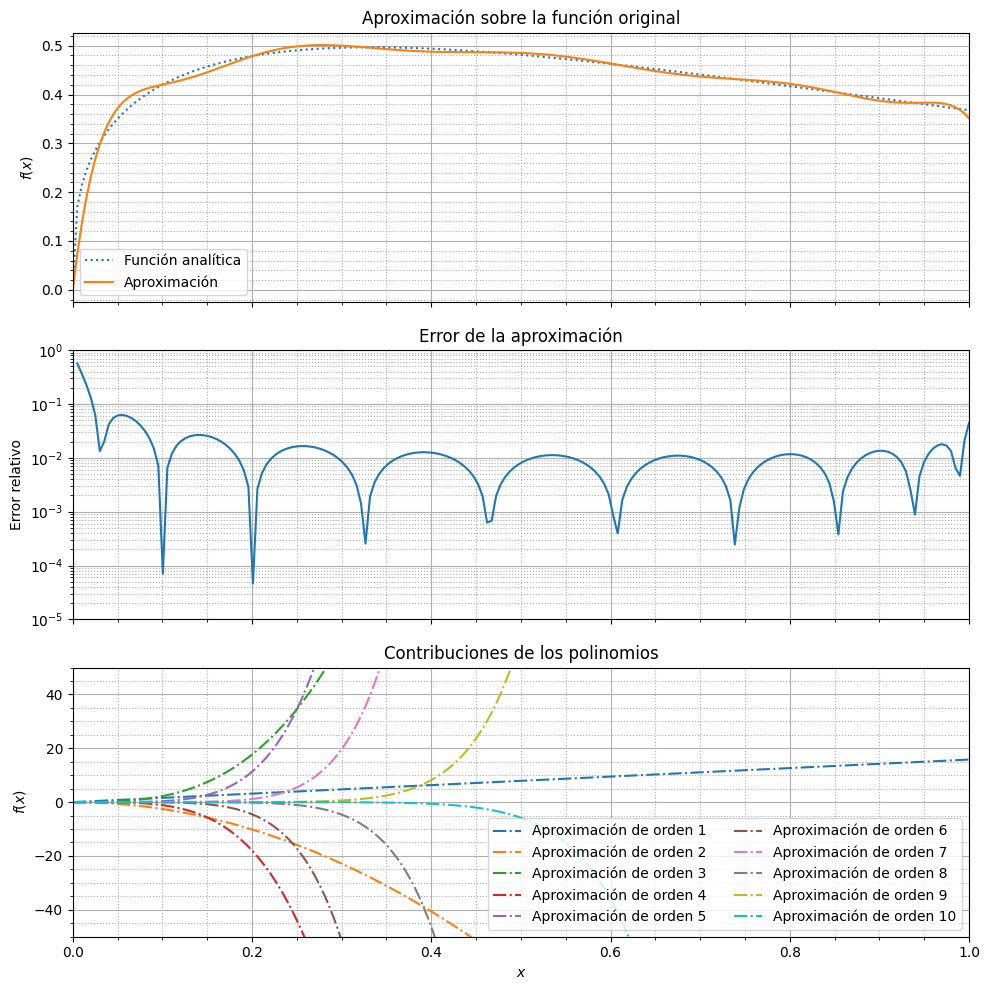

In [14]:
# Armando el polinomio para poder hacer la aproximación en la gráfica

# Creo el vector donde almaceno la solución
Ya = np.zeros_like(X)

# Iterando para sumar los términos de cada uno de los exponentes
for i in range(0, len(coef)): Ya += coef[i] * X ** (i + 1)

# Graficando el resultado de la aproximación
fig, ax = plt.subplots(3, 1, sharex = True, figsize = (10, 10))

# Función aproximada sobre la función original
ax[0].plot(X, Y, label = 'Función analítica', ls = ':')
ax[0].plot(X, Ya, label = 'Aproximación')
ax[0].set_xlim((xL, xR))

ax[0].set_ylabel('$f(x)$')
ax[0].set_title('Aproximación sobre la función original')
ax[0].grid(which = 'major')
ax[0].grid(which = "minor", linestyle = ':')
ax[0].minorticks_on()
ax[0].legend()

# Error de la aproximación
ax[1].semilogy(X, np.abs(Y - Ya) / Y)
ax[1].set_title('Error de la aproximación')
ax[1].set_ylim((1e-5, 1))
ax[1].set_ylabel('Error relativo')
ax[1].grid(which = 'major')
ax[1].grid(which = "minor", linestyle = ':')
ax[1].minorticks_on()

# Contribuciones de los polinomios
for i in range(0, len(coef)): 
    leyenda = 'Aproximación de orden ' + str(i + 1)
    ax[2].plot(X, coef[i] * X ** (i + 1), ls = 'dashdot', label = leyenda)

ax[2].legend(ncol = 2)
ax[2].set_title('Contribuciones de los polinomios')
ax[2].set_xlabel('$x$')
ax[2].set_ylabel('$f(x)$')
ax[2].grid(which = 'major')
ax[2].grid(which = "minor", linestyle=':')
ax[2].minorticks_on()
ax[2].set_ylim((-50, 50))

plt.tight_layout()
plt.show()